In [10]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd

df = pd.read_csv('s3://ia340-2025-fall-67674111/Entertainment_Sports_Gambling_Restriction_Zones.csv') # load the data from s3
df.head() #show the top 5 rows

,OBJECTID,NAME,SHAPEAREA,SHAPELEN
0,1,Audi Field,0,0
1,2,Entertainment and Sports Arena,0,0
2,3,Capital One Arena,0,0
3,4,Nationals Park,0,0
4,5,Audi Field-Nationals Park Shared,0,0


In [11]:
df.head()

,OBJECTID,NAME,SHAPEAREA,SHAPELEN
0,1,Audi Field,0,0
1,2,Entertainment and Sports Arena,0,0
2,3,Capital One Arena,0,0
3,4,Nationals Park,0,0
4,5,Audi Field-Nationals Park Shared,0,0


In [12]:
df.shape

(5, 4)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   OBJECTID   5 non-null      int64 
 1   NAME       5 non-null      object
 2   SHAPEAREA  5 non-null      int64 
 3   SHAPELEN   5 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 288.0+ bytes


In [14]:
df.describe()

,OBJECTID,SHAPEAREA,SHAPELEN
count,5.000000,5.0,5.0
mean,3.000000,0.0,0.0
std,1.581139,0.0,0.0
min,1.000000,0.0,0.0
25%,2.000000,0.0,0.0
50%,3.000000,0.0,0.0
75%,4.000000,0.0,0.0
max,5.000000,0.0,0.0


In [41]:
# Data Overview MARKDOWN1
# The data has the following rows/columns: 5 rows x 4 columns
# The following columns that exist: OBJECTID, NAME, SHAPEAREA, and SHAPELEN
# There are no missing values
# There are no duplicates detected
# First Impressions: The data is minimal, and all numbers are 0

In [22]:
df.rename(columns={"NAME": "VENUE_NAME"}, inplace=True)
df.head()

,OBJECTID,VENUE_NAME,SHAPEAREA,SHAPELEN
0,1,Audi Field,0,0
1,2,Entertainment and Sports Arena,0,0
2,3,Capital One Arena,0,0
3,4,Nationals Park,0,0
4,5,Audi Field-Nationals Park Shared,0,0


In [23]:
df.isnull().sum()
df.head()

,OBJECTID,VENUE_NAME,SHAPEAREA,SHAPELEN
0,1,Audi Field,0,0
1,2,Entertainment and Sports Arena,0,0
2,3,Capital One Arena,0,0
3,4,Nationals Park,0,0
4,5,Audi Field-Nationals Park Shared,0,0


In [24]:
df = df.dropna()
df.head()

,OBJECTID,VENUE_NAME,SHAPEAREA,SHAPELEN
0,1,Audi Field,0,0
1,2,Entertainment and Sports Arena,0,0
2,3,Capital One Arena,0,0
3,4,Nationals Park,0,0
4,5,Audi Field-Nationals Park Shared,0,0


In [42]:
# data cleaning MARKDOWN2
# Renamed column `NAME` to `VENUE_NAME`.
# All columns have zero missing values.
# I used `dropna()` to remove rows with missing data, but none were dropped.
# The dataset is already clean.

In [47]:
display(df["VENUE_NAME"])
sorted_by_name = df.sort_values(by="VENUE_NAME", ascending=True)
display(sorted_by_name)
slice_5_10 = df.iloc[5:10]
display(slice_5_10)
slice_1_4 = df.iloc[1:4]
display(slice_1_4)
filtered = df[df["VENUE_NAME"].str.contains("Arena", case=False, na=False)]
display(filtered)
df.head()

0                          Audi Field
1      Entertainment and Sports Arena
2                   Capital One Arena
3                      Nationals Park
4    Audi Field-Nationals Park Shared
Name: VENUE_NAME, dtype: object

,OBJECTID,VENUE_NAME,SHAPEAREA,SHAPELEN
0,1,Audi Field,0,0
4,5,Audi Field-Nationals Park Shared,0,0
2,3,Capital One Arena,0,0
1,2,Entertainment and Sports Arena,0,0
3,4,Nationals Park,0,0


,OBJECTID,VENUE_NAME,SHAPEAREA,SHAPELEN


,OBJECTID,VENUE_NAME,SHAPEAREA,SHAPELEN
1,2,Entertainment and Sports Arena,0,0
2,3,Capital One Arena,0,0
3,4,Nationals Park,0,0


,OBJECTID,VENUE_NAME,SHAPEAREA,SHAPELEN
1,2,Entertainment and Sports Arena,0,0
2,3,Capital One Arena,0,0


,OBJECTID,VENUE_NAME,SHAPEAREA,SHAPELEN
0,1,Audi Field,0,0
1,2,Entertainment and Sports Arena,0,0
2,3,Capital One Arena,0,0
3,4,Nationals Park,0,0
4,5,Audi Field-Nationals Park Shared,0,0


In [43]:
# Data Manipulation MARKDOWN3
# Displayed the VENUE_NAME column to list all venue names.
# Sorted rows by VENUE_NAME to reorder alphabetically.
# Sliced rows 5–10 (empty) and also rows 1–3 for an example slice.
# Filtered rows where VENUE_NAME contains "Arena".

In [35]:
import matplotlib.pyplot as plt
from IPython.display import display
grouped = df.groupby("VENUE_NAME").size().reset_index(name="Count")
display(grouped)

,VENUE_NAME,Count
0,Audi Field,1
1,Audi Field-Nationals Park Shared,1
2,Capital One Arena,1
3,Entertainment and Sports Arena,1
4,Nationals Park,1


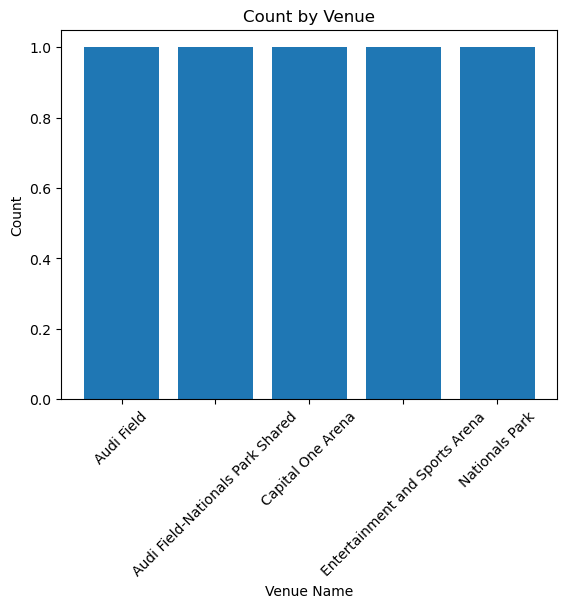

In [45]:
#Bar chart
plt.bar(grouped["VENUE_NAME"], grouped["Count"])
plt.title("Count by Venue")
plt.xlabel("Venue Name")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

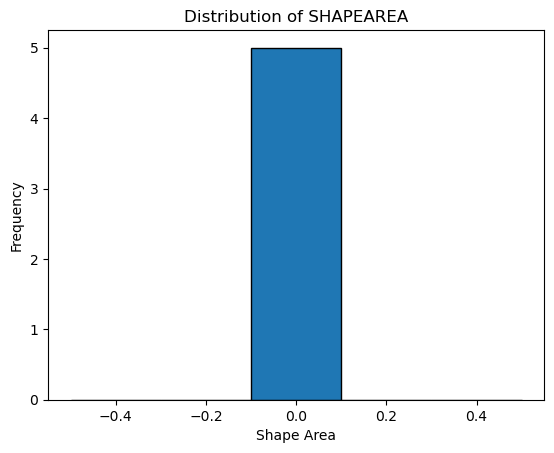

In [46]:
#Histogram of SHAPEAREA (all zeros, but shows structure)
plt.hist(df["SHAPEAREA"], bins=5, edgecolor="black")
plt.title("Distribution of SHAPEAREA")
plt.xlabel("Shape Area")
plt.ylabel("Frequency")
plt.show()

In [44]:
# Group & Visualization MARKDOWN4
# Grouped data by VENUE_NAME, each venue appears once.
# Bar chart shows counts per venue; all equal because each is unique.
# Histogram shows SHAPEAREA; all values are zero, no variation.